## Common Feature Selection Techniques
**1. Missing Value Ratio**
Suppose you’re given a dataset. What would be your first step? You would naturally want to explore the data first before building model. While exploring the data, you find that your dataset has some missing values. Now what? You will try to find out the reason for these missing values and then impute them or drop the variables entirely which have missing values (using appropriate methods).

What if we have too many missing values (say more than 50%)? Should we impute the missing values or drop the variable? I would prefer to drop the variable since it will not have much information. However, this isn’t set in stone. We can set a threshold value and if the percentage of missing values in any variable is more than that threshold, we will drop the variable.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read the data
train=pd.read_csv("Train_UWu5bXk.csv")

In [3]:
# checking the percentage of missing values in each variable
train.isnull().sum()/len(train)*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

As you can see in the above table, there aren’t too many missing values (just 2 variables have them actually). We can impute the values using appropriate methods, or we can set a threshold of, say 20%, and remove the variable having more than 20% missing values. Let’s look at how this can be done in Python:

In [4]:
# saving missing values in a variable
a = train.isnull().sum()/len(train)*100
# saving column names in a variable
variables = train.columns
variable = [ ]
for i in range(0,12):
    if a[i]<=20:   #setting the threshold as 20%
        variable.append(variables[i])

So the variables to be used are stored in “variable”, which contains only those features where the missing values are less than 20%.

**2. Low Variance Filter**

Consider a variable in our dataset where all the observations have the same value, say 1. If we use this variable, do you think it can improve the model we will build? The answer is no, because this variable will have zero variance.

So, we need to calculate the variance of each variable we are given. Then drop the variables having low variance as compared to other variables in our dataset. The reason for doing this, as I mentioned above, is that variables with a low variance will not affect the target variable.

Let’s first impute the missing values in the Item_Weight column using the median value of the known Item_Weight observations. For the Outlet_Size column, we will use the mode of the known Outlet_Size values to impute the missing values:

In [6]:
train['Item_Weight'].fillna(train['Item_Weight'].median(), inplace=True)
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0], inplace=True)

In [7]:
# check whether all the missing values have been filled
train.isnull().sum()/len(train)*100

Item_Identifier              0.0
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
Item_Outlet_Sales            0.0
dtype: float64

In [8]:
# calculate the variance of all the numerical variables
train.var()

Item_Weight                  1.786956e+01
Item_Visibility              2.662335e-03
Item_MRP                     3.878184e+03
Outlet_Establishment_Year    7.008637e+01
Item_Outlet_Sales            2.912141e+06
dtype: float64

As the above output shows, the variance of Item_Visibility is very less as compared to the other variables. We can safely drop this column. This is how we apply low variance filter. Let’s implement this in Python:

In [12]:
numeric = train[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']]
var = numeric.var()
numeric = numeric.columns
variable = [ ]
for i in range(0,len(var)):
    if var[i]>=25:   #setting the threshold as 25%
       variable.append(numeric[i])
variable    

['Item_MRP', 'Outlet_Establishment_Year']

The above code gives us the list of variables that have a variance greater than 10.

**3. High Correlation filter**
High correlation between two variables means they have similar trends and are likely to carry similar information. This can bring down the performance of some models drastically (linear and logistic regression models, for instance). We can calculate the correlation between independent numerical variables that are numerical in nature. If the correlation coefficient crosses a certain threshold value, we can drop one of the variables (dropping a variable is highly subjective and should always be done keeping the domain in mind).

As a general guideline, we should keep those variables which show a decent or high correlation with the target variable.

Let’s perform the correlation calculation in Python. We will drop the dependent variable (Item_Outlet_Sales) first and save the remaining variables in a new dataframe (df).

In [14]:
df=train.drop('Item_Outlet_Sales', 1)
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
Item_Weight,1.000000,-0.014168,0.024951,0.007739
Item_Visibility,-0.014168,1.000000,-0.001315,-0.074834
Item_MRP,0.024951,-0.001315,1.000000,0.005020
Outlet_Establishment_Year,0.007739,-0.074834,0.005020,1.000000


We don’t have any variables with a high correlation in our dataset. Generally, if the correlation between a pair of variables is greater than 0.5-0.6, we should seriously consider dropping one of those variables.

**4. Random Forest**
Random Forest is one of the most widely used algorithms for feature selection. It comes packaged with in-built feature importance so you don’t need to program that separately. This helps us select a smaller subset of features.

We need to convert the data into numeric form by applying one hot encoding, as Random Forest (Scikit-Learn Implementation) takes only numeric inputs. Let’s also drop the ID variables (Item_Identifier and Outlet_Identifier) as these are just unique numbers and hold no significant importance for us currently.

In [15]:
from sklearn.ensemble import RandomForestRegressor
df=df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)
model = RandomForestRegressor(random_state=1, max_depth=10)
df=pd.get_dummies(df)
model.fit(df,train.Item_Outlet_Sales)

C:\Users\berk\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

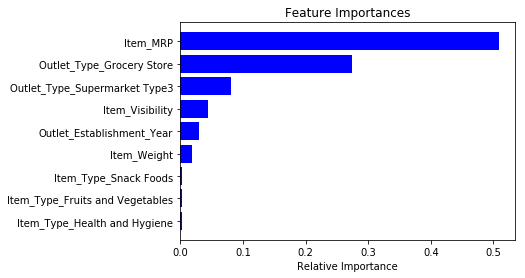

In [16]:
%matplotlib inline
features = df.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-9:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Based on the above graph, we can hand pick the top-most features to reduce the dimensionality in our dataset. Alernatively, we can use the SelectFromModel of sklearn to do so. It selects the features based on the importance of their weights.

In [17]:
from sklearn.feature_selection import SelectFromModel
feature = SelectFromModel(model)
Fit = feature.fit_transform(df, train.Item_Outlet_Sales)

**5. Backward Feature Elimination**
Follow the below steps to understand and use the ‘Backward Feature Elimination’ technique:

* We first take all the n variables present in our dataset and train the model using them
* We then calculate the performance of the model
* Now, we compute the performance of the model after eliminating each variable (n times), i.e., we drop one variable every time and train the model on the remaining n-1 variables
* We identify the variable whose removal has produced the smallest (or no) change in the performance of the model, and then drop that variable
* Repeat this process until no variable can be dropped

This method can be used when building Linear Regression or Logistic Regression models. Let’s look at it’s Python implementation:

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn import datasets
lreg = LinearRegression()
rfe = RFE(lreg, 10)
rfe = rfe.fit(df, train.Item_Outlet_Sales)

We need to specify the algorithm and number of features to select, and we get back the list of variables obtained from backward feature elimination. We can also check the ranking of the variables using the “rfe.ranking_” command.

In [26]:
rfe.ranking_

array([25,  1, 16, 14,  6, 24,  5, 11,  1, 19, 23, 22, 10,  2, 15,  1, 21,
       17,  3, 20,  1,  1, 18,  1,  1,  9, 13,  7, 12, 26,  8,  1,  1,  4,
        1])

**6. Forward Feature Selection**

This is the opposite process of the Backward Feature Elimination we saw above. Instead of eliminating features, we try to find the best features which improve the performance of the model. This technique works as follows:

* We start with a single feature. Essentially, we train the model n number of times using each feature separately
* The variable giving the best performance is selected as the starting variable
* Then we repeat this process and add one variable at a time. The variable that produces the highest increase in performance is retained
* We repeat this process until no significant improvement is seen in the model’s performance

In [27]:
from sklearn.feature_selection import f_regression
ffs = f_regression(df,train.Item_Outlet_Sales )

This returns an array containing the F-values of the variables and the p-values corresponding to each F value. For our purpose, we will select the variables having F-value greater than 10:

In [29]:
variable = [ ]
for i in range(0,len(df.columns)-1):
    if ffs[0][i] >=10:
       variable.append(df.columns[i])
variable

['Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Type_Baking Goods',
 'Outlet_Size_Medium',
 'Outlet_Size_Small',
 'Outlet_Location_Type_Tier 1',
 'Outlet_Location_Type_Tier 2',
 'Outlet_Location_Type_Tier 3',
 'Outlet_Type_Grocery Store',
 'Outlet_Type_Supermarket Type1',
 'Outlet_Type_Supermarket Type2']

This gives us the top most variables based on the forward feature selection algorithm.

**NOTE : Both Backward Feature Elimination and Forward Feature Selection are time consuming and computationally expensive.**They are practically only used on datasets that have a small number of input variables.

The techniques we have seen so far are generally used when we do not have a very large number of variables in our dataset. These are more or less feature selection techniques.

ref: https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/